## Loading the Dataset

Load the dataset ```music.csv``` into a DataFrame.
Use methods like ```head()```, ```tail()```, ```info()```, and ```describe()``` to understand the structure.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("music.csv")

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   age  gender   genre
0   20       1  HipHop
1   23       1  HipHop
2   25       1  HipHop
3   26       1    Jazz
4   29       1    Jazz


In [3]:
# Display the last few rows
print("\nLast 5 rows of the dataset:")
print(df.tail())



Last 5 rows of the dataset:
    age  gender      genre
13   27       0   Acoustic
14   30       0   Acoustic
15   31       0  Classical
16   34       0  Classical
17   35       0  Classical


In [4]:
# General information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [5]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
             age     gender
count  18.000000  18.000000
mean   27.944444   0.500000
std     5.127460   0.514496
min    20.000000   0.000000
25%    25.000000   0.000000
50%    28.000000   0.500000
75%    31.000000   1.000000
max    37.000000   1.000000


## Key Pandas Functions:

Understand the basic structure using:

- shape: Returns the dimensions of the dataset.
- columns: Lists all column names.
- dtypes: Shows the data types of each column.
- value_counts(): Frequency of values in a column.

In [6]:
# Checking the dataset shape
print("Shape of the dataset (rows, columns):", df.shape)

Shape of the dataset (rows, columns): (18, 3)


In [7]:
# Listing column names
print("Column names:", df.columns)

Column names: Index(['age', 'gender', 'genre'], dtype='object')


In [8]:
# Data types of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
age        int64
gender     int64
genre     object
dtype: object


In [9]:
# Count of unique values in 'genre'
print("\nValue counts for 'genre':")
print(df['genre'].value_counts())


Value counts for 'genre':
genre
Classical    6
HipHop       3
Jazz         3
Dance        3
Acoustic     3
Name: count, dtype: int64


## Steps in Data Cleaning:

- Check for duplicates.
- Handle missing data.
- Standardize column names.
- Verify and adjust data types.

In [10]:
# Checking for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [11]:
# Drop duplicates (if any)
df = df.drop_duplicates()

In [12]:
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age       0
gender    0
genre     0
dtype: int64


In [13]:
# Renaming columns to lowercase for consistency
df.columns = df.columns.str.lower()
print("\nUpdated Column Names:", df.columns)


Updated Column Names: Index(['age', 'gender', 'genre'], dtype='object')


## Indexing Techniques:

Selecting rows, columns, or both.
Using ```loc[]``` (label-based) and ```iloc[]``` (position-based).

In [14]:
# Selecting a single column
print("\nSelect the 'age' column:")
print(df['age'].head())


Select the 'age' column:
0    20
1    23
2    25
3    26
4    29
Name: age, dtype: int64


In [15]:
# Selecting multiple columns
print("\nSelect 'age' and 'genre':")
print(df[['age', 'genre']].head())


Select 'age' and 'genre':
   age   genre
0   20  HipHop
1   23  HipHop
2   25  HipHop
3   26    Jazz
4   29    Jazz


In [16]:
# Selecting rows by index using loc
print("\nSelect rows 0 to 3 using loc:")
print(df.loc[0:3])


Select rows 0 to 3 using loc:
   age  gender   genre
0   20       1  HipHop
1   23       1  HipHop
2   25       1  HipHop
3   26       1    Jazz


In [17]:
# Selecting rows by position using iloc
print("\nSelect rows 0 to 3 using iloc:")
print(df.iloc[0:4, :])


Select rows 0 to 3 using iloc:
   age  gender   genre
0   20       1  HipHop
1   23       1  HipHop
2   25       1  HipHop
3   26       1    Jazz


In [18]:
# Filtering rows where age > 25
print("\nFilter rows where age > 25:")
print(df[df['age'] > 25])


Filter rows where age > 25:
    age  gender      genre
3    26       1       Jazz
4    29       1       Jazz
5    30       1       Jazz
6    31       1  Classical
7    33       1  Classical
8    37       1  Classical
12   26       0   Acoustic
13   27       0   Acoustic
14   30       0   Acoustic
15   31       0  Classical
16   34       0  Classical
17   35       0  Classical


## Data Transformation:

- Adding derived columns.
- Modifying data using ```apply()```, ```map()```, and vectorized operations.

In [19]:
# Create a new column 'is_adult' (True if age >= 18)
df['is_adult'] = df['age'] >= 18

# Categorizing 'age' into groups
def categorize_age(age):
    if age < 25:
        return 'Young'
    elif age < 35:
        return 'Middle-aged'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(categorize_age)

print("\nDataset with new columns 'is_adult' and 'age_group':")
print(df.head())



Dataset with new columns 'is_adult' and 'age_group':
   age  gender   genre  is_adult    age_group
0   20       1  HipHop      True        Young
1   23       1  HipHop      True        Young
2   25       1  HipHop      True  Middle-aged
3   26       1    Jazz      True  Middle-aged
4   29       1    Jazz      True  Middle-aged


## Handling Missing Values:

- Use ```fillna()``` to fill missing values.
- Use ```dropna()``` to remove rows with missing values.

In [20]:
# Fill missing values in 'age' with the mean age
df['age'].fillna(df['age'].mean(), inplace=True)

# Drop rows with any missing values
df = df.dropna()

print("\nDataset after handling missing values:")
print(df.head())


Dataset after handling missing values:
   age  gender   genre  is_adult    age_group
0   20       1  HipHop      True        Young
1   23       1  HipHop      True        Young
2   25       1  HipHop      True  Middle-aged
3   26       1    Jazz      True  Middle-aged
4   29       1    Jazz      True  Middle-aged


C:\Users\User\AppData\Local\Temp\ipykernel_5248\2687931784.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


# Advanced Filtering

## Boolean Indexing:

Filter data with multiple conditions.
Use ```isin()``` and ```~``` for set operations.

In [21]:
# Filter rows where age is greater than 30 and genre is 'Classical'
filtered_data = df[(df['age'] > 30) & (df['genre'] == 'Classical')]
print("\nFiltered data (age > 30 and genre = 'Classical'):")
print(filtered_data)


Filtered data (age > 30 and genre = 'Classical'):
    age  gender      genre  is_adult    age_group
6    31       1  Classical      True  Middle-aged
7    33       1  Classical      True  Middle-aged
8    37       1  Classical      True       Senior
15   31       0  Classical      True  Middle-aged
16   34       0  Classical      True  Middle-aged
17   35       0  Classical      True       Senior


In [22]:
# Filter rows where genre is in a specific list
genres_to_filter = ['HipHop', 'Jazz']
filtered_genres = df[df['genre'].isin(genres_to_filter)]
print("\nFiltered data (genre in ['HipHop', 'Jazz']):")
print(filtered_genres)


Filtered data (genre in ['HipHop', 'Jazz']):
   age  gender   genre  is_adult    age_group
0   20       1  HipHop      True        Young
1   23       1  HipHop      True        Young
2   25       1  HipHop      True  Middle-aged
3   26       1    Jazz      True  Middle-aged
4   29       1    Jazz      True  Middle-aged
5   30       1    Jazz      True  Middle-aged


---

# Visualization with Pandas

Visualization Techniques:

    - Bar Chart
    - Line Chart
    - Histogram
    - Box Plot
    - Scatter Plot

In [23]:
import matplotlib.pyplot as plt

# Grouping by 'genre' and calculating the average age
average_age = df.groupby('genre')['age'].mean()

### Bar Chart

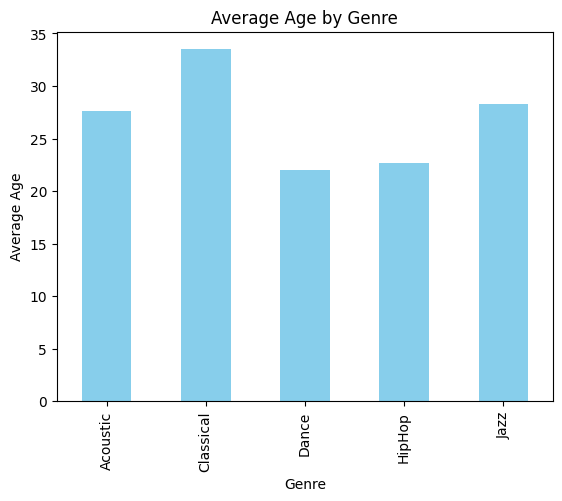

In [24]:
# Bar chart of average age by genre
average_age.plot(kind='bar', color='skyblue')
plt.title('Average Age by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Age')
plt.show()

###  Line Chart

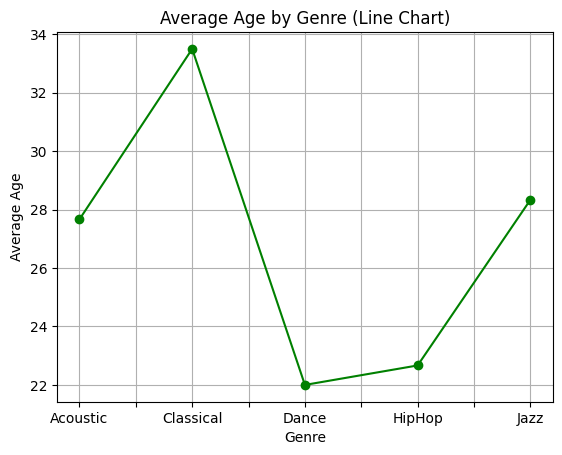

In [25]:
# Line chart of average age by genre
average_age.plot(kind='line', marker='o', color='green')
plt.title('Average Age by Genre (Line Chart)')
plt.xlabel('Genre')
plt.ylabel('Average Age')
plt.grid()
plt.show()


### Histogram

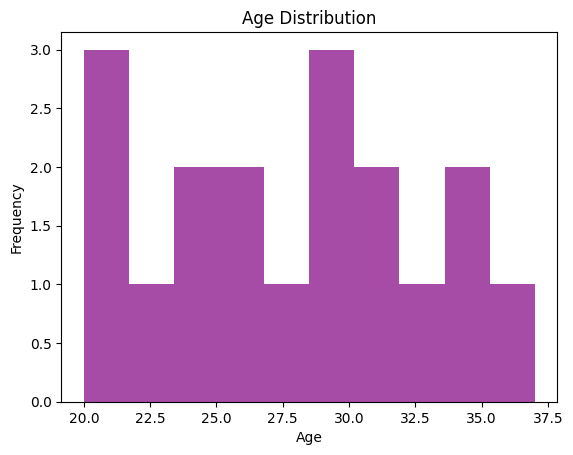

In [26]:
# Histogram of age distribution
df['age'].plot(kind='hist', bins=10, color='purple', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Box Plot

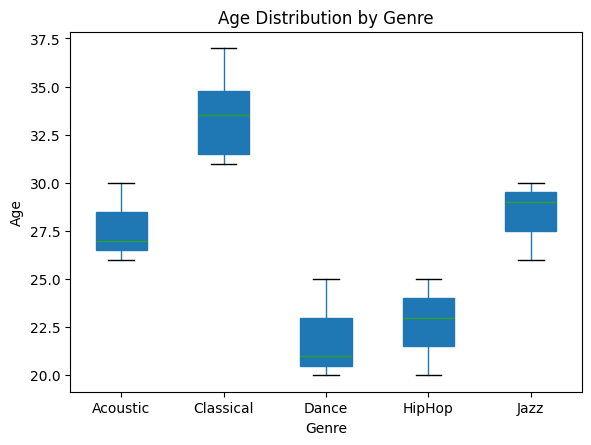

In [27]:
# Box plot of age distribution by genre
df.boxplot(column='age', by='genre', grid=False, patch_artist=True)
plt.title('Age Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Age')
plt.suptitle('')
plt.show()

### Scatter Plot

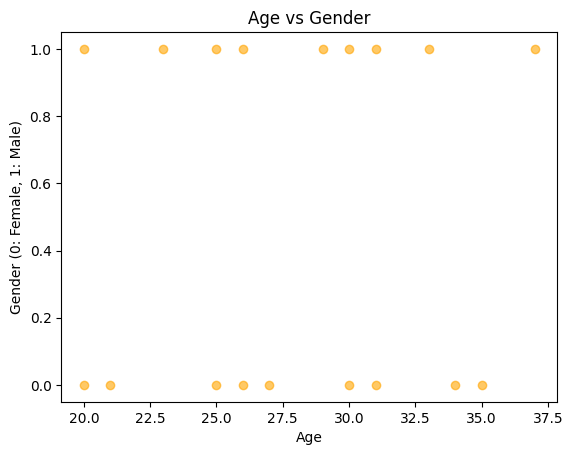

In [28]:
# Scatter plot of age vs gender
plt.scatter(df['age'], df['gender'], c='orange', alpha=0.6)
plt.title('Age vs Gender')
plt.xlabel('Age')
plt.ylabel('Gender (0: Female, 1: Male)')
plt.show()

---
# Exporting Processed Data

Save cleaned and processed data back to a CSV file using to_csv().

In [29]:
# Export the processed dataset to a new CSV
df.to_csv("processed_music.csv", index=False)
print("Processed dataset saved as 'processed_music.csv'.")

Processed dataset saved as 'processed_music.csv'.
